# HW 5: Application Questions

CS 539 Machine Learning

Aukkawut Ammartayakun

In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
#sklearn for ml models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier

## 1. KL Distance (20 points)

In question 1 in the theoretical part, we derived the KL distance between two multivariate normal. Here, we want to study KL distance for a more complex distribution. Let’s assume
$$p(x) = \frac{1}{3}\mathcal{N}(x;-1,2) + \frac{2}{3} \mathcal{N}(x;1,1)$$
and we want to approximate it by
$$q(x) = \mathcal{N}(x;m_{a},\sigma^2_{m})$$
by minimizing the KL distance between $p(x)$ and $q(x) - KL(p(x)||q(x))$.

a) Show KL distance for different values of $m_a$ and $\sigma^2_m$. To do this, you can pick different values for $m_a$ and $\sigma^2_m$, and use sampling techniques to calculate KL distance

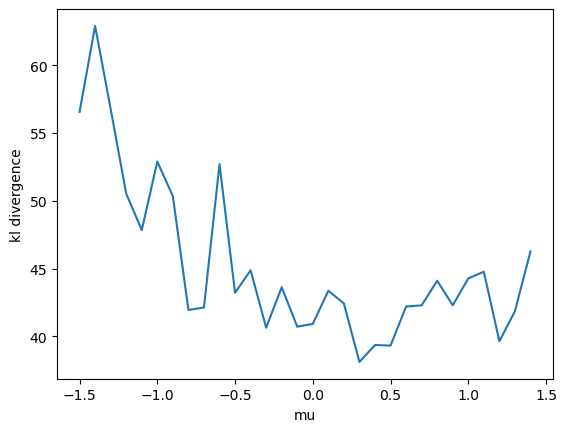

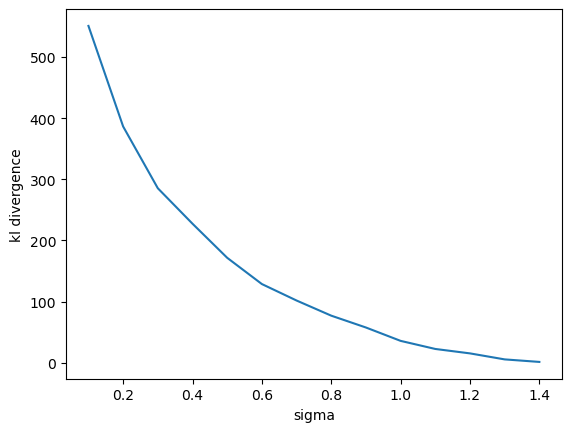

In [19]:
#define the p(x)
def p_x(x):
    return 1/3 * stats.norm.pdf(x, loc=-1, scale=np.sqrt(2)) + 2/3 * stats.norm.pdf(x, loc=1, scale=1)

# kl distance between p(x) and q(x) - KL(p(x)||q(x))
def kl_divergence(p, q):
    return - np.sum(p * np.log(p / q))

# define the q(x)
def q_x(x, mu = 0, sigma = 1):
    return stats.norm.pdf(x, loc=mu, scale=sigma)

# sampling for calculating the kl distance q(x) - kl_divergence(p, q)
def sampling(mu, sigma, n=1000):
    x = np.random.normal(mu, sigma, n)
    return kl_divergence(p_x(x), q_x(x, mu, sigma))

# plot the kl distance against mu
def plot_kl(mu, sigma):
    kl = []
    for m in mu:
        kl.append(sampling(m, sigma))
    plt.plot(mu, kl)
    plt.xlabel('mu')
    plt.ylabel('kl divergence')
    plt.show()
    #return the mu that leads to min kl distance
    return mu[np.argmin(kl)]


# plot the kl distance against sigma
def plot_kl_sigma(sigma, mu):
    kl = []
    for s in sigma:
        kl.append(sampling(mu, s))
    plt.plot(sigma, kl)
    plt.xlabel('sigma')
    plt.ylabel('kl divergence')
    plt.show()
    #return the sigma that leads to min kl distance
    return sigma[np.argmin(kl)]

m_a = plot_kl(np.arange(-1.5, 1.5, 0.1), 1)
s_a = plot_kl_sigma(np.arange(0.1,1.5, 0.1), 0)

b) In question 2, we provided the answer for $m_a$ and $\sigma^2_m$. Find the mean and variance for 𝑥 given
𝑝(𝑥), and compare that we the result in part a.

In [20]:
#find mean and variance of p(x)
mean_p, var_p = stats.norm.fit(p_x(np.arange(-5, 5, 0.1)))
print('mean of p(x): ', mean_p)
print('m_a = ', m_a)
print('variance of p(x): ', var_p)
print('s_a = ', s_a)

mean of p(x):  0.09992734573766268
m_a =  0.3000000000000016
variance of p(x):  0.10012063925293142
s_a =  1.4000000000000001


## 2.TSNE (20 points)

We discussed TSNE in class, and we want to explore its application in a dataset. The `UCI HAR Dataset`
has two folders: one training and one test folder. For the test folder, the `X_test.txt` includes the attributes
(features), `y_test.txt` carries the activities’ labels, and `subject_test.txt` carries participants’ indexes. You
can check `README.txt` to get more information about the dataset. There are 30 participants and 6
activities in the data. For this problem, use TSNE toolset to visualize possible manifold present in your
data.

a) Run TSNE on the training set and discuss the visualization results. Here, you need to check how the visualization represents participants or activities

In [22]:
#read dataset
# 2 labels type: activities from y_test.txt and subjects from subject_test.txt

train_features = pd.read_csv('./hw5data/train/X_train.txt', delim_whitespace=True,header=None)
train_activities = pd.read_csv('./hw5data/train/y_train.txt', delim_whitespace=True,header=None)
train_subjects = pd.read_csv('./hw5data/train/subject_train.txt', delim_whitespace=True,header=None)

In [3]:
#tsne 
tsne = TSNE(n_components=2, random_state=539)
X_2d = tsne.fit_transform(train_features)

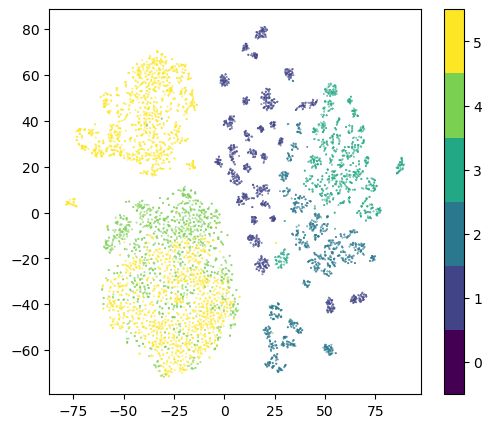

In [7]:
#plot
plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=train_activities[0], cmap=plt.cm.get_cmap("viridis", 6), s = 0.1)
plt.colorbar(ticks=range(6))
plt.clim(-0.5, 5.5)
plt.show()

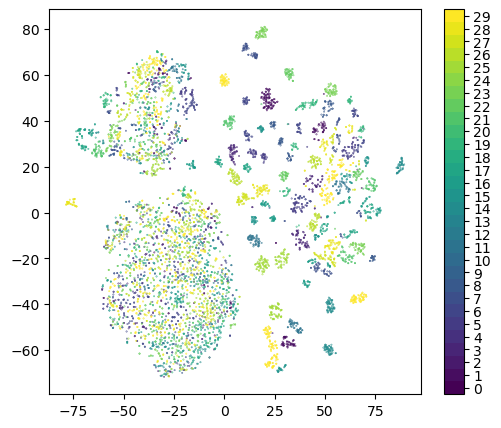

In [6]:
#plot of subjects
plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=train_subjects[0], cmap=plt.cm.get_cmap("viridis", 30), s = 0.1)
plt.colorbar(ticks=range(30))
plt.clim(-0.5, 29.5)
plt.show()


b) Run TSNE on the test set and discuss the visualization results.

In [23]:
#read test data
test_features = pd.read_csv('./hw5data/test/X_test.txt', delim_whitespace=True,header=None)
test_activities = pd.read_csv('./hw5data/test/y_test.txt', delim_whitespace=True,header=None)
test_subjects = pd.read_csv('./hw5data/test/subject_test.txt', delim_whitespace=True,header=None)

In [9]:
#tsne
tsne = TSNE(n_components=2, random_state=539)
X_2d = tsne.fit_transform(test_features)

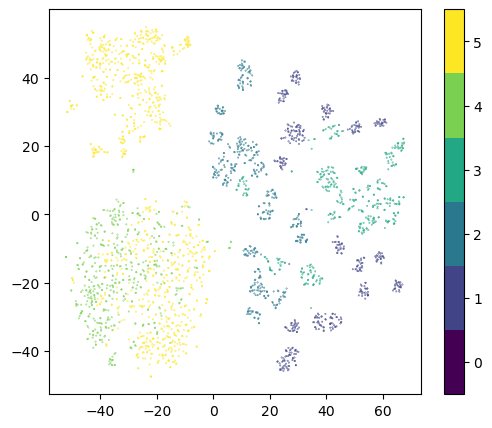

In [10]:
#plot
plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=test_activities[0], cmap=plt.cm.get_cmap("viridis", 6), s = 0.1)
plt.colorbar(ticks=range(6))
plt.clim(-0.5, 5.5)
plt.show()

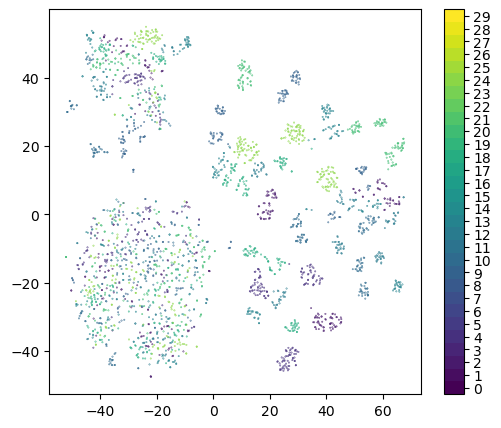

In [11]:
#plot of subjects
plt.figure(figsize=(6, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=test_subjects[0], cmap=plt.cm.get_cmap("viridis", 30), s = 0.1)
plt.colorbar(ticks=range(30))
plt.clim(-0.5, 29.5)
plt.show()

c) Discuss possible similarities (dissimilarities) you will see in parts a and b.

If the condition of getting the data is the same in both parts, then the visualization should be somewhat the same which is the case here.

## 3. Neural Networks (20 points)

We want to build NN to classify different activities and participants given their activities. The `UCI HAR
Dataset` has two folders: one training and one test folder. For the test folder, the `X_test.txt` includes the
attributes (features), `y_test.txt` carries the activities’ labels, and `subject_test.txt` carries participants’
indexes. You can check `README.txt` to get more information about the dataset. There are 30 participants
and 6 activities in the data

a) Build a NN model to classify activities given feature. Discuss your NN topology, and your test
and training performance. Note the dataset provides test and training folders.

Topology: 3 hidden layers of size 100 -> 50 -> 25. Activation function is ReLU with softmax at the end. Optimizer is Adam. Loss function is cross entropy.

In [25]:
#make neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25),max_iter=100, alpha=0.0001,
                    solver='adam',  random_state=539,tol=0.000000001)

#10-fold cross validation
#concatenate train and test for cross validation
train_features_cv = pd.concat([train_features, test_features])
train_activities_cv = pd.concat([train_activities, test_activities])
train_subjects_cv = pd.concat([train_subjects, test_subjects])

#cross validation
scores = cross_val_score(mlp, train_features_cv, train_activities_cv[0], cv=10, scoring='accuracy')
print(scores)

/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.95825243 0.92718447 0.87378641 0.9592233  0.97961165 0.97475728
 0.96407767 0.94466019 0.93009709 0.97959184]


/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


b) Build a NN model to recognize participants. Discuss your NN topology, and your test and
training performance. *Note that we have two separate groups of participants in the test and
training dataset; as a result, for this question, we first concatenate the test and training datasets
and use 10-fold cross-validation to assess the classification performance. Note the dataset
provides test and training folders.*

Topology: 3 hidden layers of size 100 -> 50 -> 25. Activation function is ReLU with softmax at the end. Optimizer is Adam. Loss function is cross entropy.

In [26]:
#make another neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25),max_iter=100, alpha=0.0001,
                    solver='adam',  random_state=539,tol=0.000000001)

#10-fold cross validation on subjects
scores = cross_val_score(mlp, train_features_cv, train_subjects_cv[0], cv=10, scoring='accuracy')
print(scores)

/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aukkawut/minicond

[0.23786408 0.32135922 0.49223301 0.73398058 0.72815534 0.3368932
 0.27087379 0.51359223 0.85436893 0.6462585 ]


/Users/aukkawut/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
